# CLASSIFICATION-LOGISTIC REGRESSION


Keep in mind as you make prediction that predicting an outcome that don't happen can be bad, while failing to predict an outcome that do happen can be fatal(bad also). Clearly, a balance must be found.

Logistic regression is better for estimating Boolean outcomes than linear regression because the logistic curve always produces a value between 0 (false) and 1 (true). Anything between these two values can be thought of as a probabilit


As logistic regression gives us these probabilities, rather than simple true/false values, we need to take extra steps to convert the result to a category. The simplest way to do this is to apply a threshold. For example, if our threshold is set to 0.5. This means that any y-value below 0.5 is converted to false and any value at above 0.5 is converted to true

In [1]:
import pandas
#Import the data from the .csv file
dataset = pandas.read_csv('https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/avalanche.csv', delimiter="\t")

In [2]:
dataset

,Unnamed: 0,avalanche,no_visitors,surface_hoar,fresh_thickness,wind,weak_layers,tracked_out
0,0,0,4,3.900508,8.715485,6,9,0
1,1,0,9,1.477586,6.801417,30,0,0
2,2,1,3,3.236594,5.632457,8,8,1
3,3,0,0,3.244283,9.348871,12,10,0
4,4,1,2,5.196741,3.782315,4,9,1
...,...,...,...,...,...,...,...,...
1090,1090,1,1,2.182905,6.109184,3,9,0
1091,1091,0,2,3.718231,10.426100,28,0,0
1092,1092,1,8,7.037647,9.741006,34,3,0
1093,1093,0,2,2.449889,7.337579,37,10,1


# Data Explorartion

# Box plot for grouping variable

Now let's plot the relationships between each feature and the target value

<AxesSubplot:xlabel='avalanche', ylabel='surface_hoar'>

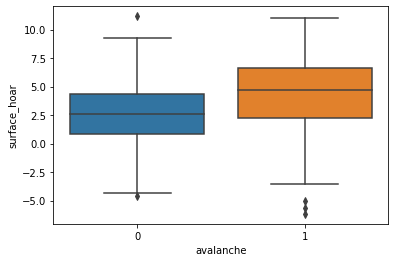

In [5]:
#import matplotlib.pyplot as plt
#fig, ax = plt.subplots()

# Add a boxplot for the "bmi" column in the DataFrames
#ax.boxplot([dataset["surface_hoar"], dataset["fresh_thickness"]])

import seaborn as sns
sns.boxplot( x=dataset["avalanche"], y=dataset["surface_hoar"])

<AxesSubplot:xlabel='avalanche', ylabel='no_visitors'>

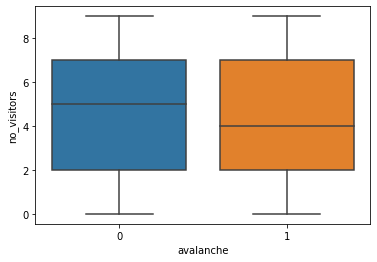

In [6]:
sns.boxplot( x=dataset["avalanche"], y=dataset["no_visitors"])

<AxesSubplot:xlabel='avalanche', ylabel='fresh_thickness'>

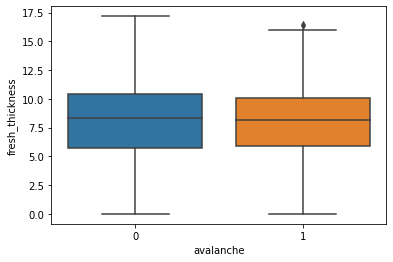

In [7]:
sns.boxplot( x=dataset["avalanche"], y=dataset["fresh_thickness"])

<AxesSubplot:xlabel='avalanche', ylabel='weak_layers'>

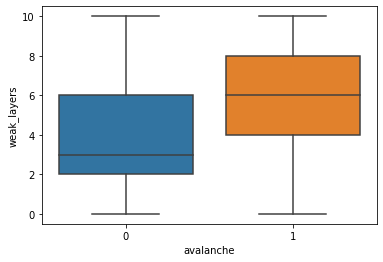

In [8]:
sns.boxplot( x=dataset["avalanche"], y=dataset["weak_layers"])

In [ ]:
# For fresh_thickness the outcomes are very similar. This means that variations in their values aren't strongly correlated with the results.

# Variations in values for weak_layers and no_visitors, seem to correlate with a 
# larger number of avalanche results, and thus we should assign more importance to these features

# Build a simple model using statsmodel

In [9]:
# Here we import a function that splits datasets according to a given ratio
from sklearn.model_selection import train_test_split

# Split the dataset in an 70/30 train/test ratio. 
train, test = train_test_split(dataset, test_size=0.3, random_state=2)
print(train.shape)
print(test.shape)

(766, 8)
(329, 8)


In [ ]:
# Fit model with only one predictor

In [10]:
import statsmodels.formula.api as smf

# Perform logistic regression.
model = smf.logit("avalanche ~ weak_layers", train).fit()

print("Model trained")

Optimization terminated successfully.
         Current function value: 0.631451
         Iterations 5
Model trained


In [11]:
# print model summary
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:              avalanche   No. Observations:                  766
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                 0.07898
Time:                        11:21:09   Log-Likelihood:                -483.69
converged:                       True   LL-Null:                       -525.17
Covariance Type:            nonrobust   LLR p-value:                 8.395e-20
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8586      0.147     -5.856      0.000      -1.146      -0.571
weak_layers     0.2241      0.026      8.648      0.000       0.173       0.275


In [ ]:
# Notice that the positive coefficient for weak_layers means that 
# a higher value means a higher likelihood for an avalanche


# Use our trained Models to make predictions and estimate probabilities

In [12]:
# predict to get a probability

# get first 3 samples from dataset
samples = test["weak_layers"][:4]

# use the model to get predictions as possibilities
estimated_probabilities = model.predict(samples)

# Print results for each sample
for sample, pred in zip(samples,estimated_probabilities):
    print(f"A weak_layer with value {sample} yields a {pred * 100:.2f}% chance of an avalanche.")

A weak_layer with value 5 yields a 56.51% chance of an avalanche.
A weak_layer with value 4 yields a 50.95% chance of an avalanche.
A weak_layer with value 7 yields a 67.05% chance of an avalanche.
A weak_layer with value 0 yields a 29.76% chance of an avalanche.


In [14]:
# plot the model
# this plots the predicted probabilites given the week_layers
predict = lambda x: model.predict(pandas.DataFrame({"weak_layers": x}))

#graphing.line_2D([("Model", predict)],
                 #x_range=[-20,40],
                 #label_x="weak_layers", 
                 #label_y="estimated probability of an avalanche")

print(predict)

<function <lambda> at 0x7fafad2f9dc0>


In [23]:
 # use the model to get predictions as possibilities
pred_prob = model.predict(dataset['weak_layers'])
pred_pro

0       0.761071
1       0.297630
2       0.717973
3       0.799423
4       0.761071
          ...   
1090    0.761071
1091    0.297630
1092    0.453579
1093    0.799423
1094    0.670468
Length: 1095, dtype: float64

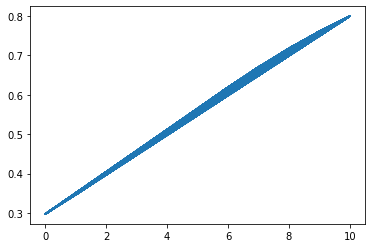

In [25]:
print("Minimum number of weak layers:", min(train.weak_layers))
print("Maximum number of weak layers:", max(train.weak_layers))

Minimum number of weak layers: 0
Maximum number of weak layers: 10


In [26]:
import numpy as np

# Get actual rates of avalanches at 0 years
avalanche_outcomes_for_0_layers = train[train.weak_layers == 0].avalanche
print("Average rate of avalanches for 0 weak layers of snow", np.average(avalanche_outcomes_for_0_layers))

# Get actual rates of avalanches at 10 years
avalanche_outcomes_for_10_layers = train[train.weak_layers == 10].avalanche
print("Average rate of avalanches for 10 weak layers of snow", np.average(avalanche_outcomes_for_10_layers))

Average rate of avalanches for 0 weak layers of snow 0.3880597014925373
Average rate of avalanches for 10 weak layers of snow 0.7761194029850746


# Classification or decision thresholds
To return a binary category (True = "avalanche", False = "no avalanche") we need to define a Classification Threshold value. Any probability above that threshold is returned as the positive category, whereas values below it will be returned as the negative category.

Let's see what happens if set our threshold to 0.5 (meaning that our model will return True whenever it calculates a chance above 50% of an avalanche happening)

In [27]:
# threshold to get an absolute value
threshold = 0.5

# Add classification to the samples we used before
for sample, pred in list(zip(samples,estimated_probabilities)):
    print(f"A weak_layer with value {sample} yields a chance of {pred * 100:.2f}% of an avalanche. Classification = {pred > threshold}")
    
    

A weak_layer with value 5 yields a chance of 76.11% of an avalanche. Classification = True
A weak_layer with value 4 yields a chance of 29.76% of an avalanche. Classification = False
A weak_layer with value 7 yields a chance of 71.80% of an avalanche. Classification = True
A weak_layer with value 0 yields a chance of 79.94% of an avalanche. Classification = True


# Performance on test set
Now let's use our test dataset to perform a quick evaluation on how the model did. 

For now, we'll just look at how often we correctly predicted if there would be an avalanche or no

In [28]:
# Classify the mdel predictions using the threshold
predictions = model.predict(test) > threshold

# Compare the predictions to the actual outcomes in the dataset
accuracy = np.average(predictions == test.avalanche)

# Print the evaluation
print(f"The model correctly predicted outcomes {accuracy * 100:.2f}% of time.")


The model correctly predicted outcomes 65.05% of time.


# Assessing a classification model

Assessing model visually

Sometimes, but not always, we can visually assess a logistic regression mode. Let's plot our model against the actual data in the test dataset

Remember that during training, we calculate how badly a model performs, and call this cost, or loss.

Using the final labels for a cost function is more useful if we want to estimate the real-world performance of our model, for instance, on the test set.



# Logg Loss function
Log loss is one of the most popular cost functions for simple classification

In [29]:
def predict(weak_layers):
    return model.predict(dict(weak_layers=weak_layers))

In [38]:
# adding predictons to the data set

dataset['predictions'] = predict(dataset['weak_layers'])
dataset

,Unnamed: 0,avalanche,no_visitors,surface_hoar,fresh_thickness,wind,weak_layers,tracked_out,predic,predictions
0,0,0,4,3.900508,8.715485,6,9,0,<function <lambda> at 0x7fafad030a60>,0.761071
1,1,0,9,1.477586,6.801417,30,0,0,<function <lambda> at 0x7fafad030a60>,0.297630
2,2,1,3,3.236594,5.632457,8,8,1,<function <lambda> at 0x7fafad030a60>,0.717973
3,3,0,0,3.244283,9.348871,12,10,0,<function <lambda> at 0x7fafad030a60>,0.799423
4,4,1,2,5.196741,3.782315,4,9,1,<function <lambda> at 0x7fafad030a60>,0.761071
...,...,...,...,...,...,...,...,...,...,...
1090,1090,1,1,2.182905,6.109184,3,9,0,<function <lambda> at 0x7fafad030a60>,0.761071
1091,1091,0,2,3.718231,10.426100,28,0,0,<function <lambda> at 0x7fafad030a60>,0.297630
1092,1092,1,8,7.037647,9.741006,34,3,0,<function <lambda> at 0x7fafad030a60>,0.453579
1093,1093,0,2,2.449889,7.337579,37,10,1,<function <lambda> at 0x7fafad030a60>,0.799423


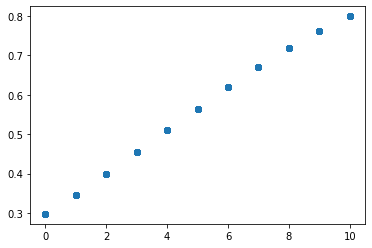

In [40]:
fig, ax = plt.subplots()

# plotting delta_fvc vs fibro_6m
ax.scatter(dataset["weak_layers"], dataset["predictions"])
plt.show()

In [ ]:
#Checking the earlier graph, we can see that our model will predict an avalanche when the number of weak layers of snow is greater than 5. We can tell this because the value of the line is 0.5 at x=5 (remember that in the previous 
# unit we defined a classifier threshold, so that probabilities over 0.5 would be classified as True)

# Assess with cost function
Let's assess our model with a log-loss cost function

In [41]:
from sklearn.metrics import log_loss

# Make predictions from the test set
predictions = model.predict(test)

# Calculate log loss
print("Log loss", log_loss(test.avalanche, predictions))
# 0.66 - what does that mean? This could be useful to compare two different models, 
# but it's hard to get a grasp on exactly what this means for real-world performance



Log loss 0.6308523505726719


# Assess accuracy

#Let's instead assess accuracy. Accuracy refers to the proportion of predictions 
#the model got correct, after predictions are converted from probabilities to avalanche or no-avalanche

In [42]:
import numpy

# Print a few predictions before we convert them to categories
print(f"First three predictions (probabilities): {predictions.iloc[0]}, {predictions.iloc[1]}, {predictions.iloc[2]}")

# convert to absolute values
avalanche_predicted = predictions >= 0.5

# Print a few predictions converted into categories
print(f"First three predictions (categories): {avalanche_predicted.iloc[0]}, {avalanche_predicted.iloc[1]}, {avalanche_predicted.iloc[2]}")

First three predictions (probabilities): 0.5651379879785626, 0.509476679940887, 0.6704676581785758
First three predictions (categories): True, True, True


In [43]:
# Calculate what proportion were predicted correctly
guess_was_correct = test.avalanche == avalanche_predicted
accuracy = numpy.average(guess_was_correct)

# Print the accuracy
print("Accuracy for whole test dataset:", accuracy)

Accuracy for whole test dataset: 0.6504559270516718


In [ ]:
#It looks like it's predicting the correct answer 61% of the time. This is helpful 
#information. What kind of mistakes is it making, though? Let's take a look at whether 
#it is guessing avalanche when there are none (false positives), or failing to guess 'avalanche' 
# when one actually occurs (false negative)

In [44]:
# False Positive: calculate how often it guessed avalanche when none actually occurred
false_positive = numpy.average(numpy.logical_not(guess_was_correct) & test.avalanche)

# False negative: calculate how often it guessed no avalanche, when one actually happened
false_negative = numpy.average(numpy.logical_not(guess_was_correct) & numpy.logical_not(test.avalanche))


print(f"Wrongly predicted an avalanche {false_positive * 100}% of the time")
print(f"Failed to predict avalanches {false_negative * 100}% of the time")

Wrongly predicted an avalanche 13.069908814589665% of the time
Failed to predict avalanches 21.88449848024316% of the time


# Improving classification models

In our exercises, we found that our model could predict avalanches so some degree, but it was still wrong around 40% of the time. This error amount is because our feature – the number of weak layers of snow – isn't the only thing that is responsible for avalanches.

There are two primary ways to improve classification model performance
providing additional features and
selective about what enters the model

Generally, the more features we add to a model, the better the model will work. This is only true, however, if the features we provide are actually relevant and explain something that existing features don't.

Yet, if supplied the model will end up modeling a relationship between avalanches and the number of birds spotted on given days. If birds were spotted more on avalanche days, the model will suggest that birds could be responsible for causing avalanches. We might then set up a systematic bird watching program to predict avalanches, only to find it doesn't work at all.


# simple logistic regression model

In [45]:

import sklearn
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf

# Perform logistic regression.
model = smf.logit("avalanche ~ weak_layers", train).fit()

# Calculate accuracy
def calculate_accuracy(model):
    '''
    Calculates accuracy
    '''
    # Make estimations and convert to categories
    avalanche_predicted = model.predict(test) > 0.5

    # Calculate what proportion were predicted correctly
    # We can use sklearn to calculate accuracy for us
    print("Accuracy:", accuracy_score(test.avalanche, avalanche_predicted))

calculate_accuracy(model)

Optimization terminated successfully.
         Current function value: 0.631451
         Iterations 5
Accuracy: 0.6504559270516718


# simple logistic regression model

# Utilizing multiple features

In [46]:
# Perform logistic regression.
model_all_features = smf.logit("avalanche ~ weak_layers + surface_hoar + fresh_thickness + wind + no_visitors + tracked_out", train).fit()
calculate_accuracy(model_all_features)
# below results: That's a big improvement on the simpler model we've been working with.

# To understand why, we can look at the summary information

Optimization terminated successfully.
         Current function value: 0.449626
         Iterations 7
Accuracy: 0.7750759878419453


In [47]:
model_all_features.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              avalanche   No. Observations:                  766
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            6
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.3442
Time:                        14:41:29   Log-Likelihood:                -344.41
converged:                       True   LL-Null:                       -525.17
Covariance Type:            nonrobust   LLR p-value:                 5.212e-75
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.0774      0.477     -8.540      0.000      -5.013      -3.142
weak_layers         0.3933      0.037     10.749      0.000       0.322       0.465
surface_hoar        0.3638      0.038      9.554      0.000       0.289       0.438
fresh_thickness    -0.0653      0.031     -2.086      0.037      -0.127      -0.004
wind                0.1116      0.010     11.215      0.000       0.092       0.131
no_visitors        -0.1204      0.034     -3.497      0.000      -0.188      -0.053
tracked_out        -0.0270      0.190     -0.143      0.887      -0.398       0.344
===================================================================================
"""

# simplyfying the model

In [48]:
# Perform logistic regression.

# getting rid of features with larger p values
# tracked_out (how trampled the snow is), and fresh_thickness
model_simplified = smf.logit("avalanche ~ weak_layers + surface_hoar + wind + no_visitors", train).fit()
calculate_accuracy(model_simplified)

Optimization terminated successfully.
         Current function value: 0.452522
         Iterations 7
Accuracy: 0.7750759878419453


In [49]:
model_all_features.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              avalanche   No. Observations:                  766
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            6
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.3442
Time:                        14:46:05   Log-Likelihood:                -344.41
converged:                       True   LL-Null:                       -525.17
Covariance Type:            nonrobust   LLR p-value:                 5.212e-75
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.0774      0.477     -8.540      0.000      -5.013      -3.142
weak_layers         0.3933      0.037     10.749      0.000       0.322       0.465
surface_hoar        0.3638      0.038      9.554      0.000       0.289       0.438
fresh_thickness    -0.0653      0.031     -2.086      0.037      -0.127      -0.004
wind                0.1116      0.010     11.215      0.000       0.092       0.131
no_visitors        -0.1204      0.034     -3.497      0.000      -0.188      -0.053
tracked_out        -0.0270      0.190     -0.143      0.887      -0.398       0.344
===================================================================================
"""

# Reflection about model

Look at the fresh_thickness row. We're told that it has a negative coefficient. This means that as thickness increases, avalanches decrease.

Similarly, no_visitors has a negative coefficient, meaning that fewer hikers means more avalanches.

How can this bes? Well, while visitors can cause avalanches if there's a lot of fresh snow, presumably they cannot do so easily if there's no fresh snow. This means that our features aren't fully independent.

We can tell the model to try to take into account that these features interact, using a multiply sign. Let's try that now

In [50]:
# Create a model with an interaction. Notice the end of the string where
# we've a multiply sign between no_visitors and fresh_thickness
formula = "avalanche ~ weak_layers + surface_hoar + wind + no_visitors * fresh_thickness"
model_with_interaction = smf.logit(formula, train).fit()
calculate_accuracy(model_with_interaction)

Optimization terminated successfully.
         Current function value: 0.396683
         Iterations 7
Accuracy: 0.7993920972644377


In [51]:
model_with_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              avalanche   No. Observations:                  766
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            6
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                  0.4214
Time:                        14:50:11   Log-Likelihood:                -303.86
converged:                       True   LL-Null:                       -525.17
Covariance Type:            nonrobust   LLR p-value:                 1.903e-92
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.5634      0.668     -0.843      0.399      -1.873       0.746
weak_layers                     0.4566      0.041     11.023      0.000       0.375       0.538
surface_hoar                    0.3973      0.041      9.646      0.000       0.317       0.478
wind                            0.1334      0.012     11.555      0.000       0.111       0.156
no_visitors                    -1.0398      0.124     -8.396      0.000      -1.283      -0.797
fresh_thickness                -0.5822      0.075     -7.732      0.000      -0.730      -0.435
no_visitors:fresh_thickness     0.1114      0.014      7.992      0.000       0.084       0.139
===============================================================================================
"""

# LOGISTIC REGRESSION with scikit-learn- datacamp

conditions for using  scikit-learn API

1 The features need to be in an array where each column is a feature and each row a different observation or data point - 
The target needs to be a single column with the same number of observations as the feature data. 

Note the use of .drop() to drop the target variable 'avalance' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays.

Without using .values, X and y are a DataFrame and Series respectively; 

the scikit-learn API will accept them in this form also as long as they are of the right shape.

there must not be amnu m issimng values in the df

In [52]:
dataset

,Unnamed: 0,avalanche,no_visitors,surface_hoar,fresh_thickness,wind,weak_layers,tracked_out,predic,predictions
0,0,0,4,3.900508,8.715485,6,9,0,<function <lambda> at 0x7fafad030a60>,0.761071
1,1,0,9,1.477586,6.801417,30,0,0,<function <lambda> at 0x7fafad030a60>,0.297630
2,2,1,3,3.236594,5.632457,8,8,1,<function <lambda> at 0x7fafad030a60>,0.717973
3,3,0,0,3.244283,9.348871,12,10,0,<function <lambda> at 0x7fafad030a60>,0.799423
4,4,1,2,5.196741,3.782315,4,9,1,<function <lambda> at 0x7fafad030a60>,0.761071
...,...,...,...,...,...,...,...,...,...,...
1090,1090,1,1,2.182905,6.109184,3,9,0,<function <lambda> at 0x7fafad030a60>,0.761071
1091,1091,0,2,3.718231,10.426100,28,0,0,<function <lambda> at 0x7fafad030a60>,0.297630
1092,1092,1,8,7.037647,9.741006,34,3,0,<function <lambda> at 0x7fafad030a60>,0.453579
1093,1093,0,2,2.449889,7.337579,37,10,1,<function <lambda> at 0x7fafad030a60>,0.799423


In [55]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
# the features must be only continous variables, so im dropping all the other cat features and creating a new df with 
# just the target label and cont features. cat varaibles will be dealth with later
df = dataset[['avalanche', 'surface_hoar','fresh_thickness','weak_layers','wind']]
y = df['avalanche'].values
X = df.drop('avalanche', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

# k-Nearest Neighbors: Predict

In [70]:

# Predict the labels for the training data X: y_pred
# here we are predicting using the same training data, but ideally, we should be predicting on the test dataset after test train split
y_pred = knn.predict(X)
print("Prediction: {}".format(y_pred))

# Predict and print the label for the new data point X_new
#new_prediction = knn.predict(X_new)
#print("Prediction New: {}".format(new_prediction)) 


Prediction: [1 0 0 ... 1 1 0]


In [63]:
X_new = dataset['no_visitors'].values
X_new

array([4, 9, 3, ..., 8, 2, 3])

# ACCURACY AND MODEL COMPLEXITY CURVES

In [76]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()


In [74]:
# i will be using the df for this tutorial

In [80]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

# Create feature and target arrays
y = df['avalanche'].values
X = df.drop('avalanche', axis=1).values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y) # stratify = 1 ensures that
# the labels in both traing and test set are equally distributed as thet were in the original data set

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.7351598173515982


# Overfitting and underfitting
if decision boundary is smooth, then  the model is less complesx as is what we want generally and the decision boundary becomes smooth generally for larger k values. this results to underfitting as not all points are captured

if k is small, then the decisoon boundar is generaly rough and no smooth, this is suggesting a very complex model and the model tries to  capture every data point  and this resukts to over fitting


Task is to compute accuracy, compute and plot the training and testing accuracy scores for a variety of different neighbor values( values of k). By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.



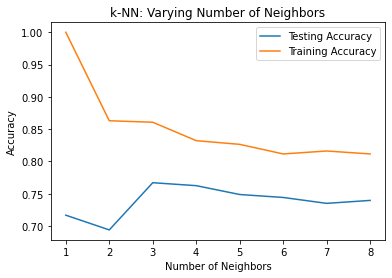

In [81]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# comparing model complexity curves will give you an idea of the best number of neighbours to use so as to avoid under/overfitting
#  in this case, 3 to  5 seems to the best number of neighbours. this should correspond to where the accuracu score is highest

# class imbalance

Accuracy is not always a correct matrics to use to measure model performance in cases where there is class imbalance

e.g in a spam priblem,. 99% of emaills are real and only 1% are false(spam)
such a model will classify all emails as real and would be correct 99% of the time with an accuracy of 99%

there is class imbalance here as the class of real emails contain way more classes than the class of spams
In this case, a different mnatrics other than accuracy is required to assess performance

a confusion matrix can be called which also has accuracy embeddded in it

the category thatb you are trying toi detect is called the positive class

In [85]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[160  38]
 [ 75 165]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       198
           1       0.81      0.69      0.74       240

    accuracy                           0.74       438
   macro avg       0.75      0.75      0.74       438
weighted avg       0.75      0.74      0.74       438



# Logistic regression using scikitlearn

#used in classification problemns, not regression problems

generally, we use as default threshold of prob = 0.5
if prob = 0., model predicts 1 for all the data points, meaning true positive = false positive
of prob  = 1, the model predicts 0 for all the data, meaning both true and false positive are zero

In [86]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[147  51]
 [ 49 191]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       198
           1       0.79      0.80      0.79       240

    accuracy                           0.77       438
   macro avg       0.77      0.77      0.77       438
weighted avg       0.77      0.77      0.77       438



# ROC Curves


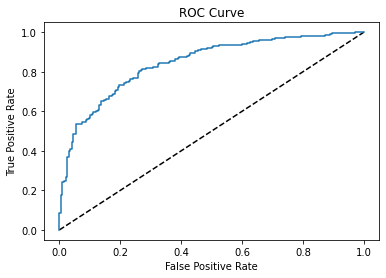

In [89]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
# unpack the output of this into the variables
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# AREA UNDER A CURVE

 THE BIGGER THE AUC VALUE, THE BETTER THE CLASSIFIER

In [90]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob: .predict_proba() method on logreg to compute the predicted probabilitie
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8442340067340067


In [91]:
# WE CAN ALSO COMPUTE AUC FOR CROSS VALIDATION

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

# we can later calculate the mean and sd of these 5 auc values

AUC scores computed using 5-fold cross-validation: [0.84980604 0.85152949 0.82246071 0.86758492 0.86564137]


# HYparameter Tuniung- GRID SEARC CROSS VALIDATION

when fitting a model, we have to choose values that fits the data well and thise values are nvere learnit by the model
so we specify these parameters e.g alpha for lasso/ridge regression, n for knn neighbours
we generally have to try all these values, fit them separately and see how each one porforms and then choose the best one. We always use cross validadtion when trying different sets of hyper parameters
we choose a grid of possible values we wasnt to try for the hyperparameters and then nlater choose the parameters the performs best. This is called Grid Search Cross validation

logistic regression also has a regularization parameter: . C controls the inverse of the regularization strength, and this is what you will tune in this exercise

A large C can lead to an overfit model, while a small C can lead to an underfit model.

In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next , the below script doesnt show any hold out set


In [93]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}  # this is a dictionarty of the parameters

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.7689497716894976


# Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [94]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
# Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


# NB Note that RandomizedSearchCV will never outperform GridSearchCV. 
#Instead, it is valuable because it saves on computation time


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 7}
Best score is 0.7351598173515981


/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 903, in fit
    super().fit(
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 289, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed

# Hold-out set for final evaluation

 after performing cross validation, we neede to report how well out model perfoms on data it has never seen before
 
 using all data for cross validation is not ideal, so we need to split the data into training set and hold outr set
 
 trainng model on training set and select parameters on traimning set
 use hold out set to test model performance
 
 =========================
 
 In addition to , logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.
 

In [97]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
# Tune the hyperparameters on the training set using GridSearchCV with 5-folds.
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
# Use the following format to access an attribute of an object: object_name.attribute_name. 
#For example: logreg_cv.best_score_.
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/uczhn/opt/anac

/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/uczhn/opt/anac

Tuned Logistic Regression Parameter: {'C': 0.006105402296585327, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7746819338422392


/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/uczhn/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/uczhn/opt/anac

# Elastic net regressor- extra stuff

Hold-out set in practice II: Regression
Remember lasso and ridge regression from the previous chapter? Lasso used the  penalty to regularize, while ridge used the  penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the  and  penalties:


In scikit-learn, this term is represented by the 'l1_ratio' parameter: An 'l1_ratio' of 1 corresponds to an  penalty, and anything lower is a combination of  and .

In this exercise, you will GridSearchCV to tune the 'l1_ratio' of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.
    

# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))
